### Building a Linear Model with Autograd

#Building a Simple Linear Model with one single neuron and no activation function, and use AutoGrad package to train neural network weights
X_train has features to train the model and Y train corresponds to target values.

In [3]:
# Importing Packages
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Setting up X train and Y_train 

x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816],
                    [8.9], [5.2], [8.59], [2.1], [8],
                    [10], [4.5], [6], [4]],
                   dtype = np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.41], [2.4], [3.357],
                    [2.6], [1.96], [3.53], [1.76], [3.2],
                    [3.5], [1.6], [2.5], [2.2]],
                   dtype = np.float32)


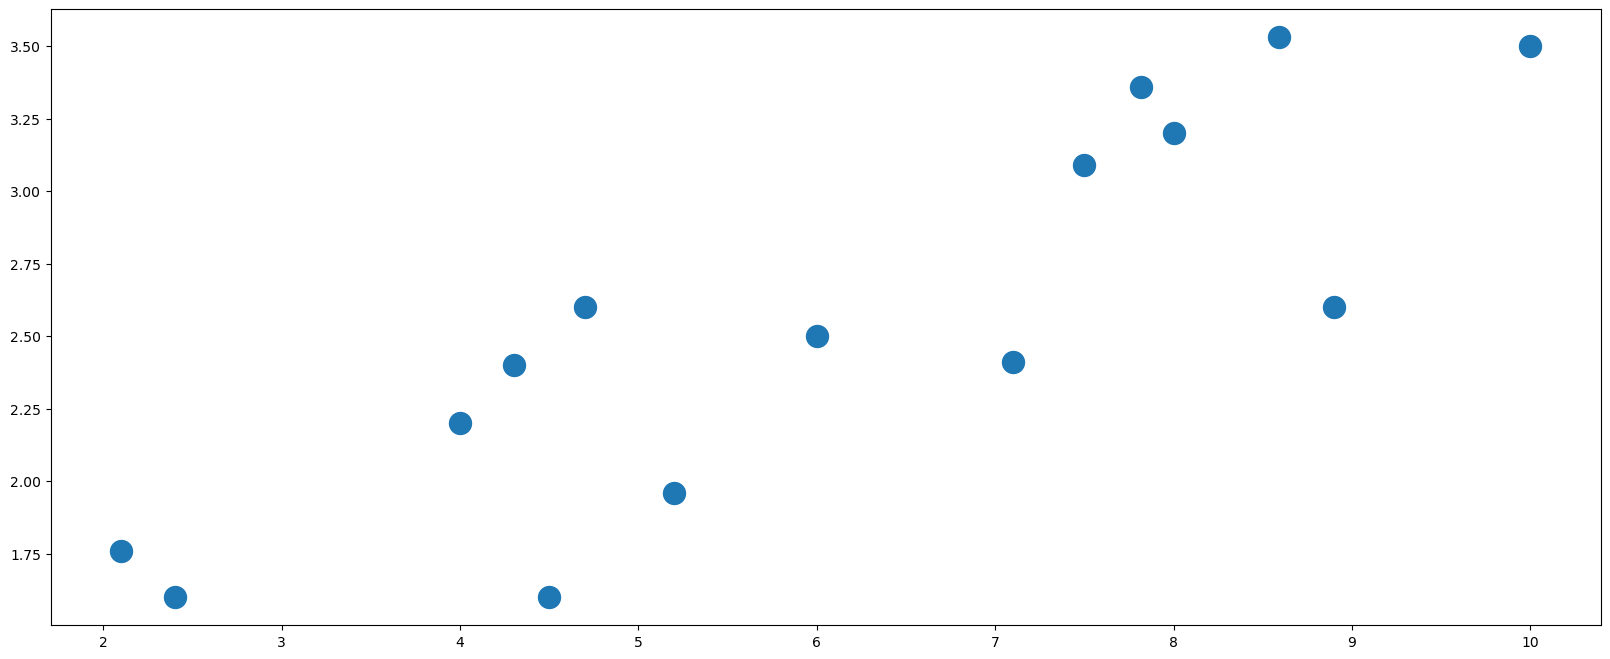

In [5]:
# Analyzing relationships between X and Y with scatter plot

plt.figure(figsize=(20,8))
plt.scatter(x_train, y_train, s=250)
plt.show()

there is some linear relationship between X and Y

In [7]:
# converting numpy arrays to tensors

X_train= torch.tensor(x_train)
X_train

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [8]:
Y_train= torch.from_numpy(y_train)
Y_train

tensor([[2.6000],
        [1.6000],
        [3.0900],
        [2.4100],
        [2.4000],
        [3.3570],
        [2.6000],
        [1.9600],
        [3.5300],
        [1.7600],
        [3.2000],
        [3.5000],
        [1.6000],
        [2.5000],
        [2.2000]])

In [9]:

print("requires grad for X_train:", X_train.requires_grad)
print("requires grad for Y_train:", Y_train.requires_grad)

requires grad for X_train: False
requires grad for Y_train: False


#setting up our simple neural network with one input X, one hidden layer with one neuron and one output variable
we are not using pytorch built-in layers , but constructing one manually with tensors

In [11]:

input=1
hidden=1
output=1

#Model Parameters:
w1 contains weights for our input network,w2 corresponds to weights between hidden-layer and output-layer; 
 w1 and w2 will be trained using autograd

In [13]:
# W1 contains weights for our input network 

w1= torch.rand(input, hidden, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [14]:
#w2 corresponds to weights between hidden-layer and output-layer

w2= torch.rand(hidden, output, requires_grad=True)
w2.shape

torch.Size([1, 1])

#Now we specify a design hyperparameter of out network which is learning rate. 
Learning rate determines the size of the step that model parameters take towards the optimum

In [38]:

learning_rate= 1e-6

#we will train the neural network for a number of iterations
for iter in range(1,4000):

    #first step is to make a Forward pass through the neura network inorder to get predicted values
    y_pred = torch.mm(torch.mm(X_train, w1), w2) #ForwardPass, no activation function, input*w1*w2

    #now we calculate Mean Square error loss for regression
    loss= (y_pred-Y_train).pow(2).sum() #loss function

    #for every 50 iterations we will print out the loss to check convergence
    if iter%50==0:
        print(iter, loss.item())  #value of loss for every 50 iteration to check convergence

    #now calculating gradients by performing backward pass
    loss.backward()  # to calculate gradients for model parameters
    
    #gradient vectors will now be available for tensors w1 and w2. 
    #gradients for w1 and w2 are calculated w.r.t Mean square error loss and stored in w1.grad and w2.grad
    
    #updating models weights. we dont need to enable tracking hence we use torch.no_grad() block
    with torch.no_grad(): 
        
        #the below gives new values of w1 and w2
        w1.data = w1 - learning_rate * w1.grad 
        w2.data = w2 - learning_rate * w2.grad
        
        # zero out existing gradients for next pass
        w1.grad.zero_() 
        w2.grad.zero_()
        
        
    
    

50 5.14083194732666
100 5.0416083335876465
150 4.951282501220703
200 4.869112491607666
250 4.794413089752197
300 4.726524829864502
350 4.664890289306641
400 4.608952522277832
450 4.558209419250488
500 4.512205123901367
550 4.470512866973877
600 4.432746887207031
650 4.398556709289551
700 4.367613315582275
750 4.33962345123291
800 4.314306735992432
850 4.2914228439331055
900 4.270740985870361
950 4.2520551681518555
1000 4.23518180847168
1050 4.219946384429932
1100 4.206196308135986
1150 4.193788051605225
1200 4.1825947761535645
1250 4.17249870300293
1300 4.163394927978516
1350 4.155188083648682
1400 4.147790431976318
1450 4.141123294830322
1500 4.135118007659912
1550 4.129707336425781
1600 4.124831676483154
1650 4.120443820953369
1700 4.116493225097656
1750 4.112935543060303
1800 4.1097331047058105
1850 4.1068525314331055
1900 4.1042585372924805
1950 4.101924896240234
2000 4.099825859069824
2050 4.097937107086182
2100 4.096238136291504
2150 4.094709873199463
2200 4.0933356285095215
2250

In [40]:
print("w1: " , w1)
print("w2: " , w2)

w1:  tensor([[0.7571]], requires_grad=True)
w2:  tensor([[0.5232]], requires_grad=True)


In [42]:
x_train_tensor= torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [44]:
predicted_in_tensor= torch.mm(torch.mm(x_train_tensor, w1),w2)
predicted_in_tensor

tensor([[1.8618],
        [0.9507],
        [2.9709],
        [2.8124],
        [1.7033],
        [3.0961],
        [3.5255],
        [2.0598],
        [3.4027],
        [0.8318],
        [3.1689],
        [3.9612],
        [1.7825],
        [2.3767],
        [1.5845]], grad_fn=<MmBackward0>)

In [46]:
predicted= predicted_in_tensor.detach().numpy()
predicted

array([[1.8617554 ],
       [0.95068365],
       [2.9708865 ],
       [2.8124392 ],
       [1.7033083 ],
       [3.0960598 ],
       [3.5254517 ],
       [2.0598145 ],
       [3.4026551 ],
       [0.8318481 ],
       [3.1689456 ],
       [3.9611816 ],
       [1.7825317 ],
       [2.3767092 ],
       [1.5844728 ]], dtype=float32)

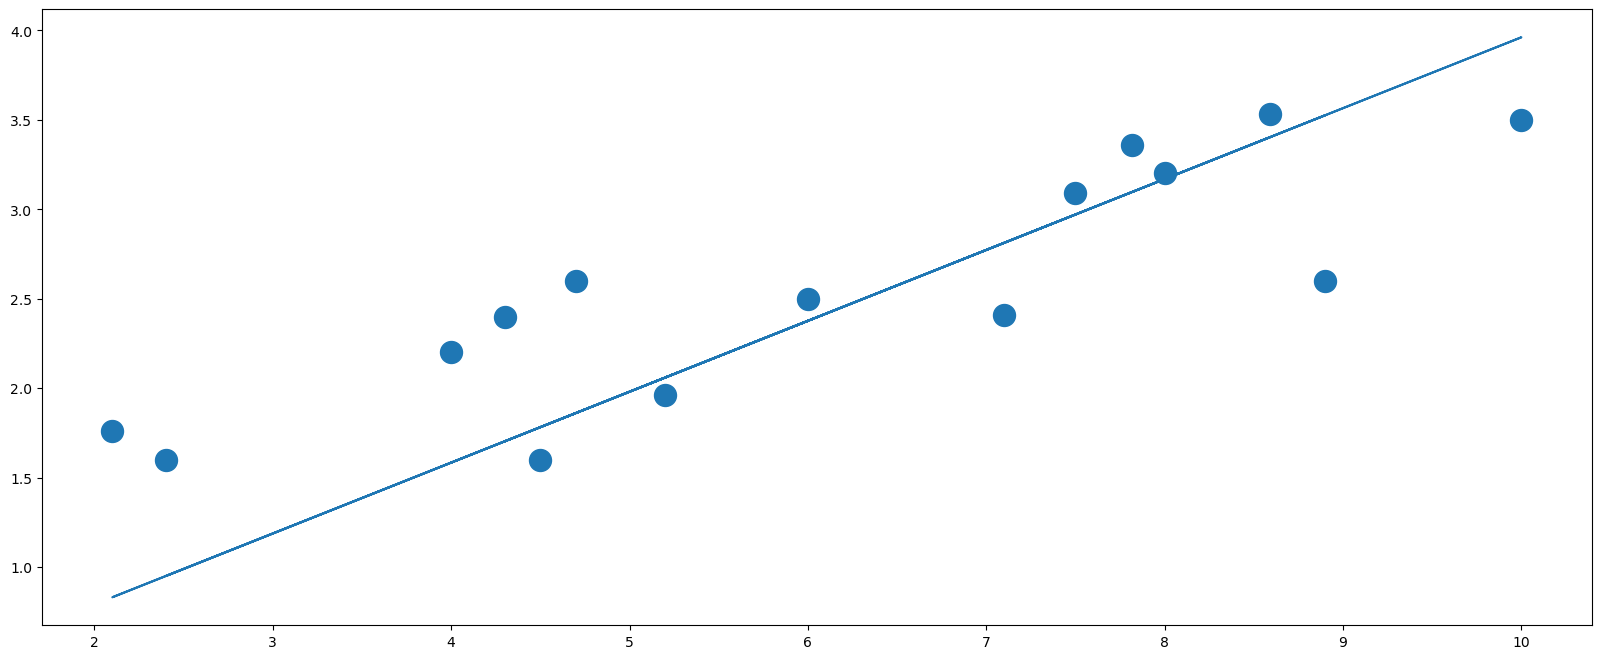

In [48]:
plt.figure(figsize=(20,8))
plt.scatter(x_train, y_train, s=250)

plt.plot(x_train, predicted)

plt.show()

#By increasing the number of iterations we train the network longer. The above graph shows that out model has done pretty well.